# Analyse Fréquentielle du RC

Soit un circuit RC, dont la constante de temps vaut $\tau = 20\, \mathrm{s}$, de fonction de transfert:

$$ H(s) = \frac{1}{20s + 1} $$

On demande de:

1. Tracer les diagrammes de Bode numériquement en créant votre propre code
2. Simuler la sortie de ce circuit pour une entrée cosinusoïdale de fréquence $f=0.5\, \mathrm{Hz}$ sur 100 secondes avec 10001 points
3. Justifier le comportement temporel du circuit RC grâce aux diagrammes de Bode

L'exercice peut être réalisé sur Excel ou à l'aide d'un langage de programmation (Python, C++, Java).

---

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math

1. Tracer les diagrammes de Bode numériquement en créant votre propre code

In [5]:
# Création du vecteur de pulsations
w_min = math.log10(0.0005)
w_max = math.log10(5)

n = 10001

w = [10 ** (w_min + (w_max - w_min) * i / n) for i in range(n)]

# Calcul de l'amplitude et de la phase
mag = [-20 * math.log10(math.sqrt((20 * w_i) ** 2 + 1)) for w_i in w]
phase = [math.atan(-20 * w_i) * 180 / math.pi for w_i in w]

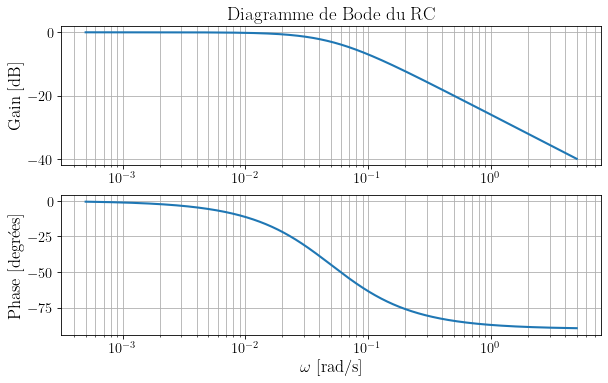

In [6]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].semilogx(w, mag)
axs[1].semilogx(w, phase)
axs[0].set_title('Diagramme de Bode du RC')
axs[0].set_ylabel('Gain [dB]')
axs[1].set_ylabel('Phase [degrées]')
axs[1].set_xlabel('$\omega$ [rad/s]')
axs[0].grid(True, which='both')
axs[1].grid(True, which='both')

---

2. Simuler la sortie de ce circuit pour une entrée cosinusoïdale de fréquence $f=0.5\, \mathrm{Hz}$ sur 100 secondes avec 10001 points

In [4]:
# Création du vecteur temps et de l'entrée
t_min = 0
t_max = 100

f = 0.5

n = 10001

t = [t_min + i / n * t_max for i in range(n)]
u = [math.cos(f * 2 * math.pi * t_i) for t_i in t]

In [5]:
# algorithme d'Euler
tau = 20
y = [0]

h = t[1] - t[0]

for u_i in u[:-1]:
    y.append(y[-1] + h * (u_i - y[-1]) / tau)

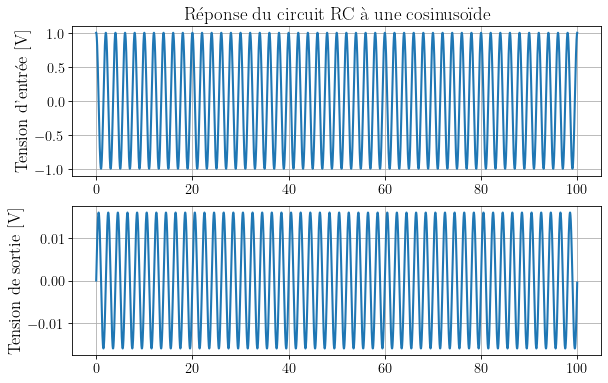

In [6]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t, u)
axs[1].plot(t, y)
axs[0].set_title('Réponse du circuit RC à une cosinusoïde')
axs[0].set_ylabel('Tension d\'entrée [V]')
axs[1].set_ylabel('Tension de sortie [V]')
axs[0].grid(True)
axs[1].grid(True)

---

3. Justifier le comportement temporel du circuit RC grâce aux diagrammes de Bode

La simulation temporelle montre que la tension de sortie possède une amplitude de $0.0159$ et un déphasage d'environ $90\, ^\circ$.

On retrouve ces résultats sur les diagrammes de Bode pour une pulsation $\omega = 2\pi f = 3.14\, \mathrm{rad/s}$

En effet, sur le diagramme de Bode, on a pour cette pulsation:

- $G_{dB} = -35.93\, \mathrm{dB}$
- $\Phi = -89.15\, ^\circ$

La sortie est donc la cosinusoïde d'entrée, multipliée par un gain $K = 10^{-35.93/20} = 0.01598$ et déphasée de $89.15\, ^\circ$ en arrière.